In [255]:
from nufeb_tools import utils,plot,spatial
import numpy as np
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1 import AxesGrid,axes_divider,make_axes_locatable
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import LogNorm,ListedColormap
from scipy.signal import find_peaks
import matplotlib as mpl
#import tables

In [2]:

x = utils.get_data(test=True)


In [3]:
x.nutrients

['co2', 'o2', 'sub', 'suc']

In [4]:
grid = x.grid
# Nutrient grid array, timepoint, nutrient, z,x,y
grid.shape

(101, 4, 5, 50, 50)

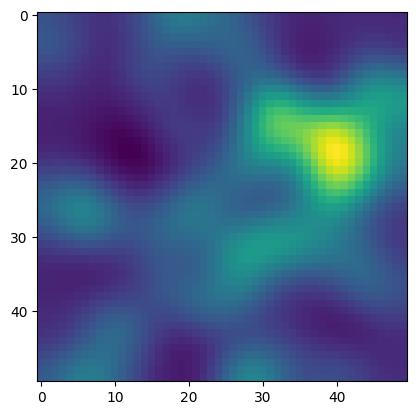

In [5]:
plt.imshow(grid[100,3,1,:,:])
plt.show()

Assigning ancestry:   0%|          | 0/100 [00:00<?, ?it/s]d:\nufeb_tools\src\nufeb_tools\utils.py:305: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  motherless = pd.merge(temp,ancestors,on='ID',how='left', indicator=True).query('_merge == "left_only"').drop('_merge', 1).drop('x_y',1).iloc[:,:4]
Assigning ancestry: 100%|██████████| 100/100 [00:02<00:00, 36.43it/s]
d:\nufeb_tools\src\nufeb_tools\utils.py:311: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.join(ancestry_df.set_index(['ID']),on='ID',how='right', lsuffix='_left', rsuffix='').drop('mother_cell_left',1)


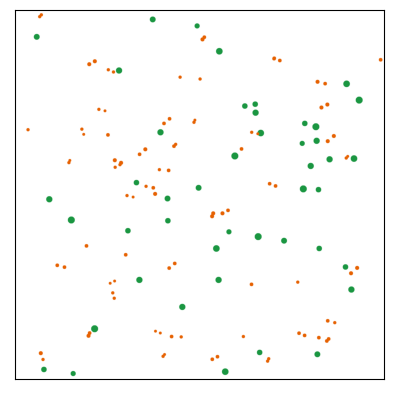

In [6]:
plot.colony(x,100,by='species')
plt.show()

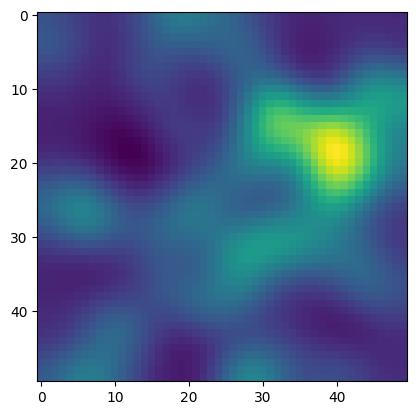

In [7]:


obj = x
df = obj.colonies.copy()
colors = {1 : (26,150,65) ,2 : (230,97,1)}
dims=obj.metadata['Dimensions']
tp = df[df.Timestep == 100]
circles = [Circle((round(x_/dims[0]*obj.grid.shape[3]),
            round(y_/dims[1]*obj.grid.shape[4])),round(radius/dims[1]*(obj.grid.shape[3]+obj.grid.shape[4])/2),
            ) for x_,y_, radius,type_ in zip(tp.x,tp.y,tp.radius,tp.type)]
patches=[]
f,ax = plt.subplots()
ax.imshow(grid[100,3,1,:,:])
for circle in circles:
    
#circle = Circle((.5, .5), .5)
    ax.add_patch(circle)

plt.show()

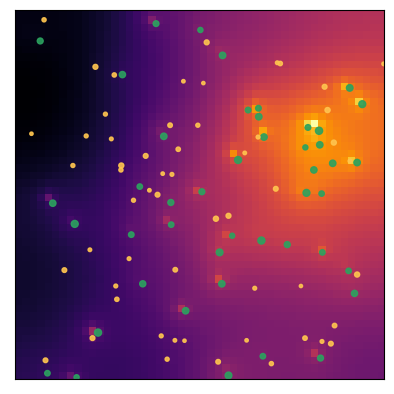

In [8]:
tp = df[df.Timestep == 0].reset_index()

f,ax = plt.subplots()
ax.imshow(grid[1,3,1,:,:],cmap='inferno')
#colors=['g','r']
colors=['#2ca25f','#fec44f']
for x_,y_, radius,type_ in zip(tp.x,tp.y,tp.radius,tp.type):
    xx = x_/dims[0]*obj.grid.shape[3]
    yy= y_/dims[1]*obj.grid.shape[4]
    r = radius/dims[1]*(obj.grid.shape[3]+obj.grid.shape[4])/2    
    circle = Circle((xx, yy), r,color = colors[type_-1],alpha=0.9)
    ax.add_patch(circle)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

In [9]:
x = utils.get_data(directory=r'E:\sucrose\runs\Run_50_50_1.00e+00_1_2022-01-03_246283')

Assigning ancestry: 100%|██████████| 350/350 [01:23<00:00,  4.19it/s]


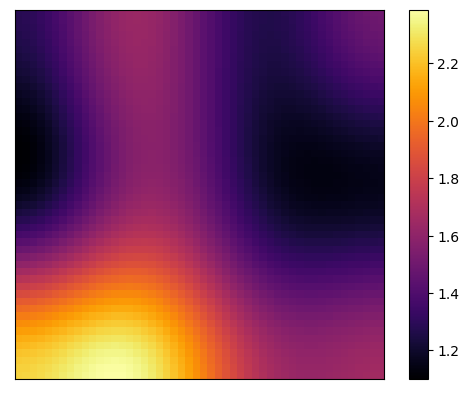

In [10]:
obj = x
if not hasattr(obj,'colonies'):
    obj.get_mothers()
df = obj.colonies.copy()
colors = {1 : (26,150,65) ,2 : (230,97,1)}
dims=obj.metadata['Dimensions']
time = 30000
tp = df[df.Timestep == time]
grid = x.grid
f,ax = plt.subplots()
it = list(df.Timestep.unique()).index(time)
im = ax.imshow(grid[it,3,1,:,:],cmap='inferno')
#colors=['g','r']
colors=['#2ca25f','#fec44f']
#for x_,y_, radius,type_ in zip(tp.x,tp.y,tp.radius,tp.type):
  #  xx = x_/dims[0]*obj.grid.shape[3]
  #  yy= y_/dims[1]*obj.grid.shape[4]
  #  r = radius/dims[1]*(obj.grid.shape[3]+obj.grid.shape[4])/2    
  #  circle = Circle((xx, yy), r,color = colors[type_-1],alpha=0.9)
  #  ax.add_patch(circle)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
f.colorbar(im, ax=ax)
plt.show()

In [11]:
df.Timestep.unique()[299]

29900

In [12]:
suc = grid[:,3,:,:,:]
suc = np.mean(suc,axis=1)
suc_mean = np.mean(suc,axis=(1,2))
suc_min = np.min(suc,axis=(1,2))
suc_max = np.max(suc,axis=(1,2))
suc_r = suc_max/suc_min


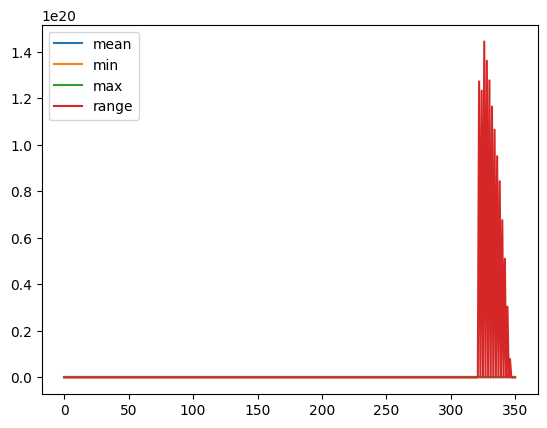

In [13]:
plt.plot(suc_mean,label='mean')
plt.plot(suc_min,label='min')
plt.plot(suc_max,label='max')
plt.plot(suc_r,label='range')
plt.legend()
plt.show()

In [14]:
suc.shape

(351, 50, 50)

In [15]:
np.argmax(suc_r)

326

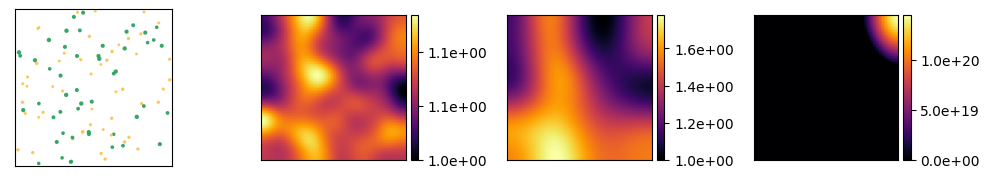

In [16]:
def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    cax.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
    plt.sca(last_axes)
    return cbar

tp = df[df.Timestep == 0]
grid = x.grid
f,axes = plt.subplots(ncols=4,figsize=(10,4))
it = list(df.Timestep.unique()).index(time)
times = [np.argmax(suc_mean),200,np.argmax(suc_r)]

for ax,t in zip(axes.ravel()[1:],times):
  s = np.mean(grid[t,3,:,:,:],axis=0)
  im = ax.imshow(s/s.min(),cmap='inferno')
  colorbar(im)

#colors=['g','r']
colors=['#2ca25f','#fec44f']
for x_,y_, radius,type_ in zip(tp.x,tp.y,tp.radius,tp.type):
    xx = x_/dims[0]*obj.grid.shape[3]
    yy= y_/dims[1]*obj.grid.shape[4]
    r = radius/dims[1]*(obj.grid.shape[3]+obj.grid.shape[4])/2    
    circle = Circle((xx, yy), r,color = colors[type_-1],alpha=0.9)
    axes[0].add_patch(circle)
axes[0].set_xlim(0,50)
axes[0].set_ylim(0,50)
axes[0].set_aspect('equal')
for ax in axes.ravel():
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
f.tight_layout()
plt.show()

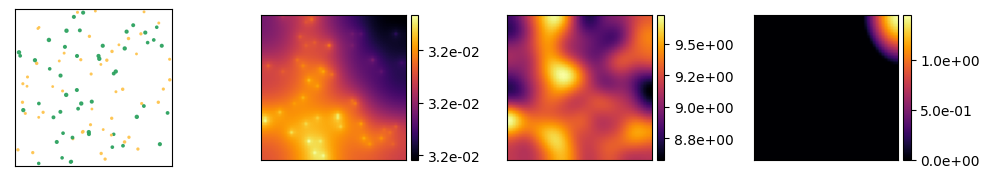

In [17]:
""" tp = df[df.Timestep == 0]
grid = x.grid
f,axes = plt.subplots(ncols=4,figsize=(10,4))
it = list(df.Timestep.unique()).index(time)
times = [1,np.argmax(suc_mean),np.argmax(suc_r)]

for ax,t in zip(axes.ravel()[1:],times):
  s = np.mean(grid[t,3,:,:,:],axis=0)
  im = ax.imshow(s,cmap='inferno')
  colorbar(im)

#colors=['g','r']
colors=['#2ca25f','#fec44f']
for x_,y_, radius,type_ in zip(tp.x,tp.y,tp.radius,tp.type):
    xx = x_/dims[0]*obj.grid.shape[3]
    yy= y_/dims[1]*obj.grid.shape[4]
    r = radius/dims[1]*(obj.grid.shape[3]+obj.grid.shape[4])/2    
    circle = Circle((xx, yy), r,color = colors[type_-1],alpha=0.9)
    axes[0].add_patch(circle)
axes[0].set_xlim(0,50)
axes[0].set_ylim(0,50)
axes[0].set_aspect('equal')
for ax in axes.ravel():
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
f.tight_layout()
plt.show() """

In [18]:
def plot_cells(obj,type_,t,ax):
    obj = x
    if not hasattr(obj,'colonies'):
        obj.get_mothers()
    df = obj.colonies.copy()
    colors=['#2ca25f','#fec44f']
    dims=obj.metadata['Dimensions']
    tp = df[(df.Timestep==df.Timestep.unique()[t]) & (df.type==type_)]
    circles = [Circle((x_/dims[0]*obj.grid.shape[3], y_/dims[1]*obj.grid.shape[4]), radius/dims[1]*(obj.grid.shape[3]+obj.grid.shape[4])/2 ,color = colors[type_-1],alpha=0.9) for x_,y_, radius in zip(tp.x,tp.y,tp.radius)]
    coll = PatchCollection(circles,facecolors=colors[type_-1])
    ax.add_collection(coll)
    ax.set_xlim(0,obj.grid.shape[3])
    ax.set_ylim(0,obj.grid.shape[4])
    ax.set_aspect('equal')
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    return

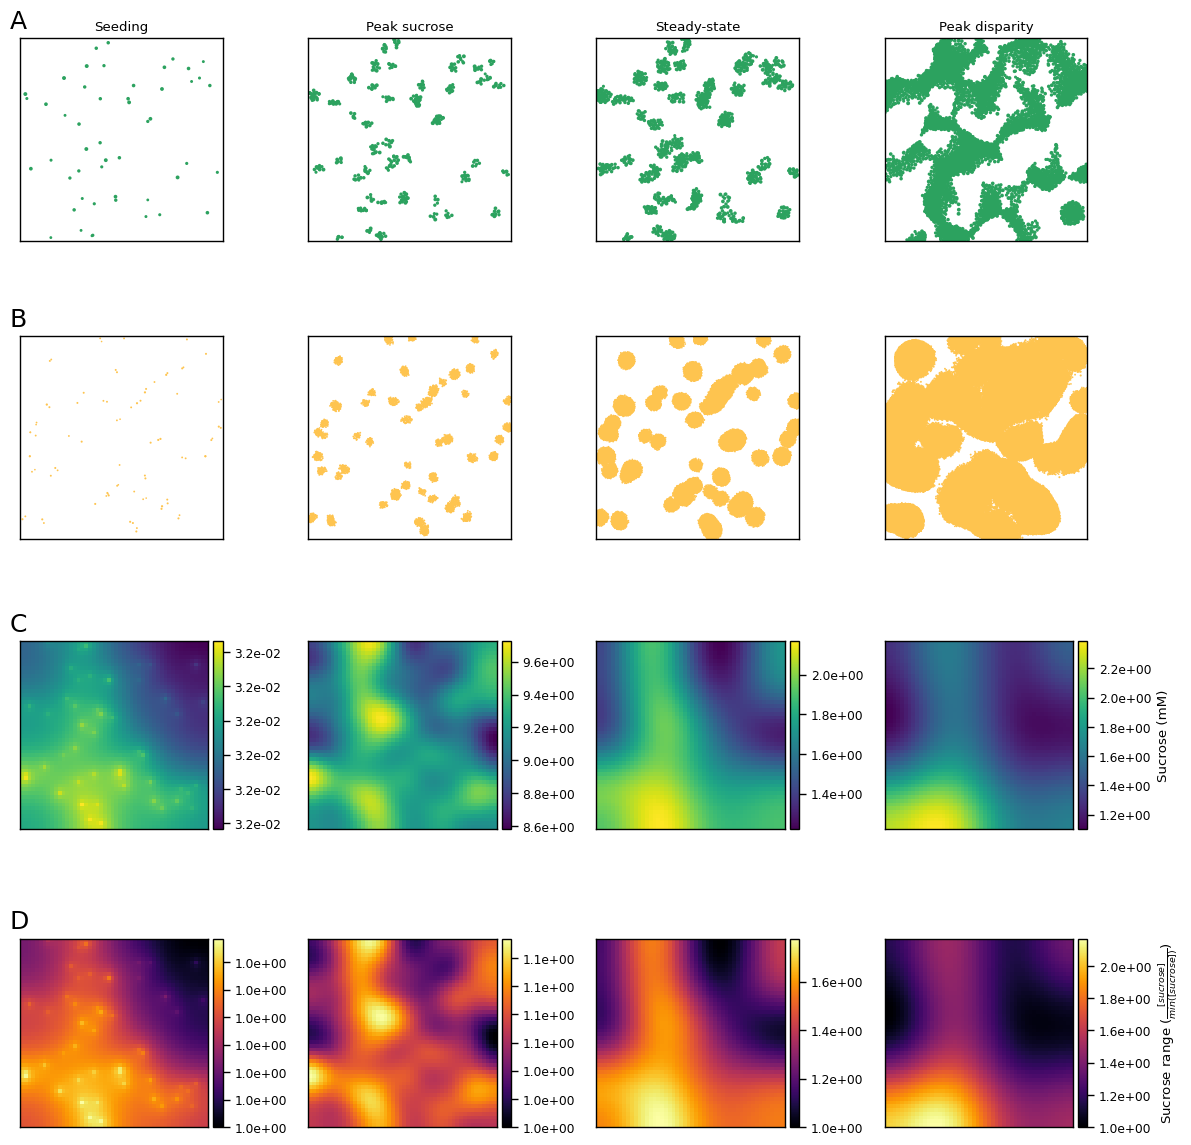

In [19]:
from matplotlib import transforms
import string
sns.set_context('paper')
def label_panel(ax, letter, *,
                offset_left=0.1, offset_up=0.1, prefix='', postfix='', **font_kwds):
    kwds = dict(fontsize=18)
    kwds.update(font_kwds)
    # this mad looking bit of code says that we should put the code offset a certain distance in
    # inches (using the fig.dpi_scale_trans transformation) from the top left of the frame
    # (which is (0, 1) in ax.transAxes transformation space)
    fig = ax.figure
    trans = ax.transAxes + transforms.ScaledTranslation(-offset_left, offset_up, fig.dpi_scale_trans)
    ax.text(0, 1, prefix+letter+postfix, transform=trans, **kwds)

def label_panels(axes, letters=None, **kwds):
    if letters is None:
        letters=string.ascii_uppercase[0:len(axes)]
        
    for ax,letter in zip(axes,letters):
        label_panel(ax, letter, **kwds)

times = [1,np.argmax(suc_mean),200,300]#np.argmax(suc_r)
dims=x.metadata['Dimensions']
grid = x.grid
suc = grid[:,3,:,:,:]
suc = np.mean(suc,axis=1)
suc_mean = np.mean(suc,axis=(1,2))
suc_min = np.min(suc,axis=(1,2))
suc_max = np.max(suc,axis=(1,2))
suc_r = suc_max/suc_min
f,axes=plt.subplots(nrows=4,ncols=4,figsize=(12,12))
for ax,t in zip(axes[0,:].ravel(),times):
    plot_cells(x,1,t,ax)
for ax,t in zip(axes[1,:].ravel(),times):
    plot_cells(x,2,t,ax)
for ax,t in zip(axes[2,:].ravel(),times):
    s = np.mean(grid[t,3,:,:,:],axis=0)
    im = ax.imshow(s)#vmin=0,vmax=np.max(np.mean(grid[:,3,:,:,:],axis=1))
    cb1 = colorbar(im)
    
smax =0
smin= 0
for t in times:
    s = np.mean(grid[t,3,:,:,:],axis=0)
    sm = np.max(s/s.min())
    sm2 = np.min(s/s.min())
    if sm > smax:
        smax = sm
    if sm2 > smin:
        smin = sm2
for ax,t in zip(axes[3,:].ravel(),times):
    s = np.mean(grid[t,3,:,:,:],axis=0)
    im2 = ax.imshow(s/s.min(),cmap='inferno')#,norm=LogNorm(vmin=(s/s.min()).max()*1e-2, vmax=(s/s.min()).max())
    cb2 = colorbar(im2)
for ax in axes.ravel():
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    
cb1.ax.set_ylabel('Sucrose (mM)')   
cb2.ax.set_ylabel(r'Sucrose range ($\frac{[sucrose]}{min([sucrose])}$)') 
""" box = axes[2,-1].get_position()
# create color bar
axColor = plt.axes([box.x0*1.05 + box.width * 1.05, box.y0, 0.01, box.height])
plt.colorbar(im, cax = axColor, orientation="vertical")
axColor.set_ylabel('Sucrose (mM)')
box = axes[3,-1].get_position()
# create color bar
axColor = plt.axes([box.x0*1.05 + box.width * 1.05, box.y0, 0.01, box.height])

plt.colorbar(im2, cax = axColor, orientation="vertical")
axColor.set_ylabel(r'Sucrose disparity ($\frac{[sucrose]}{min([sucrose])}$)') """
cols = ['Seeding','Peak sucrose','Steady-state','Peak disparity']
rows = ['S. elgonatus','E. coli','Sucrose (mM)','Sucrose ratio']


for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')

label_panels(axes[:,0].ravel())
f.tight_layout()
#f.savefig(r'example-gradient.png',dpi=600)
plt.show()

In [21]:
def colorFader(c1,c2,n): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    
    mix = np.linspace(0,1,n+1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    cols = list()
    for i in range(n):
        cols.append(mpl.colors.to_hex((1-mix[i])*c1 + mix[i]*c2))
    return cols
def colorFaderRGB(c1,c2,n): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)

    mix = np.linspace(0,1,n+1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    cols = list()
    for i in range(n):
        cols.append(tuple((((1-mix[i])*c1 + mix[i]*c2)*256).astype('int')))
    return cols

In [102]:

tuple((np.array(mpl.colors.to_rgb('#ffffff'))*256).astype('int'))

(256, 256, 256)

In [239]:
import matplotlib.patches as mpatches
def colony(obj,time,colors=None,colony=None,outline=None,ax=None,by=None,img=np.array([]),overlay=False,**kwargs):
    """
    Plot bacterial colonies at a specific timepoint

    Args:
        obj (nufeb_tools.utils.get_data): 
            Object containing cell locations
        time (int): 
            Simulation timestep to plot
        colors (dict, optional): 
            Dictionary of colors to plot each colony. Defaults to None.
        colony (int, optional): 
            Plot a specific colony. Defaults to None.
        ax (matplotlib.pyplot.axes, optional): 
            Axis to plot on. Defaults to None.
        by (str, optional): 
            Plot by species. Defaults to None.
    """

    if not hasattr(obj,'colonies'):
        obj.get_mothers()
    df = obj.colonies
    ax = ax or plt.gca()
    timepoint = time
    dims=obj.metadata['Dimensions']
    if img.size==0:
        img_size = 2000
        bk = 255 * np.ones(shape=[img_size, img_size, 3], dtype=np.uint8)
    else:
        img_size = img.shape[0]
        bk = img
    if by == 'Species' or by == 'species' or by == 'type':

        colors = dict()
        IDs1 =np.sort(df.loc[df.type==1].mother_cell.unique())
        cya = colorFaderRGB('#01665e','#c7eae5',len(IDs1))

        colors.update({i: cya[i] for i,_ in enumerate(IDs1)})
        IDs2 =np.sort(df.loc[df.type==2].mother_cell.unique())
        ecw = colorFaderRGB('#8c510a','#f6e8c3',len(IDs2))

        colors.update({i+len(IDs1): ecw[i] for i,_ in enumerate(IDs2)})
        tp = df[df.Timestep == timepoint]
        circles = [cv2.circle(bk,center = (round(x/dims[0]*img_size),
                    round(y/dims[1]*img_size)),radius = round(radius/dims[1]*img_size),
                    color = (int(colors[cell][0]),int(colors[cell][1]),int(colors[cell][2])),thickness = -1) for x,y, radius,cell in zip(tp.x,tp.y,tp.radius,tp.mother_cell)]
    elif colony == None and by == None:
        if colors == None:
            IDs = np.sort(df[df.mother_cell != -1].mother_cell.unique())
            colors = {x : tuple(np.random.randint(0,255, 3).astype('int')) for x in IDs}
        tp = df[df.Timestep == timepoint]
        circles = [cv2.circle(bk,center = (round(x/dims[0]*img_size),
                    round(y/dims[1]*img_size)),radius = round(radius/dims[1]*img_size),
                    color = (int(colors[cell][0]),int(colors[cell][1]),int(colors[cell][2])),thickness = -1) for x,y, radius,cell in zip(tp.x,tp.y,tp.radius,tp.mother_cell)]
    elif colony != None:
        if colors == None:
            colors = tuple(np.random.randint(0,255, 3).astype('int'))
        color = colors
        tp = df[(df.Timestep == timepoint) & (df.mother_cell==colony)]
        if outline:
            circles = [cv2.circle(bk,center = (round(x/dims[0]*img_size),
            round(y/dims[1]*img_size)),radius = round(radius/dims[1]*img_size),
            color = (int(color[0]),int(color[1]),int(color[2])),thickness = -1) for x,y, radius,cell in zip(tp.x,tp.y,tp.radius,tp.mother_cell)]
        else:
            circles = [cv2.circle(bk,center = (round(x/dims[0]*img_size),
                        round(y/dims[1]*img_size)),radius = round(radius/dims[1]*img_size),
                        color = (int(color[0]),int(color[1]),int(color[2])),thickness = -1) for x,y, radius,cell in zip(tp.x,tp.y,tp.radius,tp.mother_cell)]
    if overlay:
        scale = 5
        temp = df[(df.ID==colony) & (df.Timestep==0)]
        radius = temp.radius.values
        w= scale*radius/x.metadata['Dimensions'][0]*2000
        h=scale*radius/x.metadata['Dimensions'][0]*2000

        xx = (temp.x/x.metadata['Dimensions'][0]*img_size)-w/2
        yy = (temp.y/x.metadata['Dimensions'][1]*img_size)-h/2
    """             rect=mpatches.Rectangle((xx,yy),w,h, 
                                    fill = True,
                                    facecolor = (color[0]/255,color[1]/255,color[2]/255),alpha=0.3,
                                    linewidth = 2)
            plt.gca().add_patch(rect) """
    ax.imshow(bk)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    return bk

In [288]:


gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
def plot_color_gradients(cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    #axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=cmap_list[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()
    fig.tight_layout()
    fig.savefig('../figures/color-swatches.pdf',bbox_inches='tight')
    plt.show()

<Figure size 640x480 with 0 Axes>

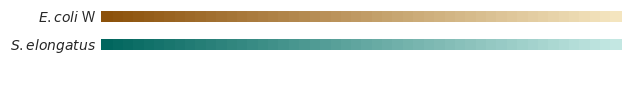

In [289]:
ecw =ListedColormap(colorFader('#8c510a','#f6e8c3',50), name='ecw')
cya= ListedColormap(colorFader('#01665e','#c7eae5',50), name='cyano')
cmaps = {r'$\it{E. coli }$ W':ecw,r'$\it{S. elongatus}$':cya}

plot_color_gradients(cmaps)



In [240]:
metrics = spatial.fitness_metrics(x)
sorted = metrics.sort_values(by=['total biomass']).loc[metrics.type==2].reset_index(drop=True)


C:\Users\Jonathan\anaconda3\envs\pyscaffold\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [241]:
least_fit = sorted.mother_cell.iloc[15]
most_fit = sorted.mother_cell.iloc[-1]
sorted.head()

,mother_cell,type,Voronoi Area,IPTG,total biomass,Nearest 1,Nearest 2,Nearest Neighbor,IC1,IC2,...,Z1_2,Z2_1,LogNearest 1,LogNearest 2,LogNearest,Inv1,Inv2,Log Inv1,Log Inv2,Colony Area
0,68,2,2.351138e-10,1.0,13265.161906,0.000011,0.000012,0.000011,0.000008,0.000008,...,502.590442,295.926009,-11.421866,-11.342384,-11.421866,91296.375188,84320.838744,22.843733,22.684769,3637.0
1,56,2,2.292885e-10,1.0,23141.953823,0.000008,0.000011,0.000008,0.000008,0.000008,...,362.600516,286.004870,-11.748340,-11.376485,-11.748340,126543.354290,87245.819677,23.496681,22.752970,4749.0
2,61,2,1.960071e-10,1.0,24869.591092,0.000004,0.000011,0.000004,0.000008,0.000008,...,165.503205,286.004870,-12.532651,-11.376485,-12.532651,277243.486501,87245.819677,25.065303,22.752970,5268.0
3,64,2,1.846499e-10,1.0,28105.194982,0.000009,0.000005,0.000005,0.000008,0.000008,...,410.641532,135.395174,-11.623921,-12.124296,-12.124296,111739.027802,184295.559279,23.247843,24.248592,9924.0
4,78,2,1.127978e-10,1.0,36047.347968,0.000010,0.000013,0.000010,0.000008,0.000008,...,457.615724,328.422757,-11.515612,-11.238192,-11.515612,100269.031790,75977.467270,23.031224,22.476384,12695.0


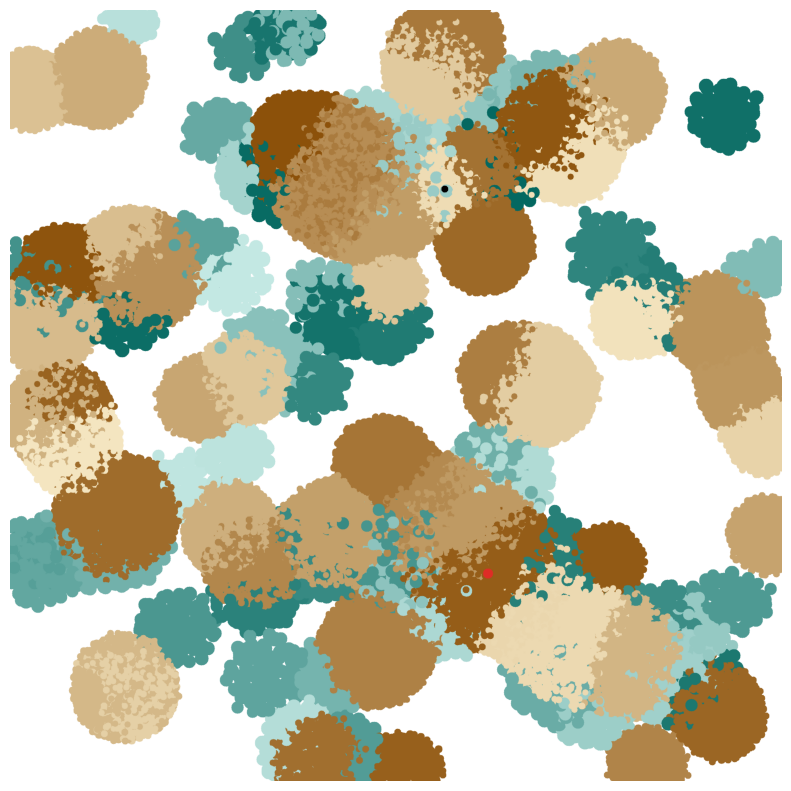

In [242]:
f, ax = plt.subplots(figsize=(8,8))
im = colony(x,25900,by='Species',ax=ax)
colony(x,0,colony=most_fit,outline=True,colors=(222,45,38),ax=ax,img=im,overlay=True)
colony(x,0,colony=least_fit,outline=True,colors=(0,0,0),ax=ax,img=im,overlay=True)
ax.set_axis_off()
f.tight_layout()
plt.show()
f.savefig('../figures/colony-plot.pdf',bbox_inches='tight')


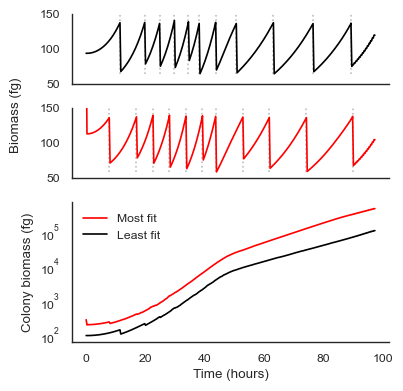

In [243]:
sns.set_context('paper')
sns.axes_style("ticks")
color = ['k','r']
mf = df.loc[df.mother_cell==most_fit,['time','total_biomass']].groupby('time').mean().reset_index()
lf = df.loc[df.mother_cell==least_fit,['time','total_biomass']].groupby('time').mean().reset_index()
fig = plt.figure(figsize=(4,4))
spec = fig.add_gridspec(ncols=1, nrows=3, 
                          height_ratios=[1,1,2])
axes=spec.subplots().ravel()
for i,(ax,id) in enumerate(zip(axes[:3],[least_fit,most_fit])):
    data = df[df.ID==id].reset_index()
    ax.plot(data.time,data.biomass,color=color[i])
    
    ax.set_ylim(50,150)
    pks, _ = find_peaks(data.biomass,width=1)
    for peak in pks:
        ax.vlines(data.time[peak],data.biomass.min(),data.biomass.max()*1.1,color='#bdbdbd',ls=':')
sns.lineplot(x='time',y='total_biomass',data=mf,color='r',ax=axes[2])
sns.lineplot(x='time',y='total_biomass',data=lf,color='k',ax=axes[2])
fig.text(0.005, 0.7, 'Biomass (fg)', va='center', rotation='vertical')
axes[2].set_ylabel('Colony biomass (fg)')
axes[2].set_yscale('log')
#axes[2].set_ylim(8e1,2e5)
#for ax in axes:
    #ax.set_xlim(0,72)

for ax in axes[:2]:
    ax.tick_params(bottom=False,left=False)
    ax.set_xticklabels([])
axes[2].set_xlabel('Time (hours)')
axes[2].legend(labels=['Most fit','Least fit'],frameon=False)

sns.despine()
fig.tight_layout()
plt.show()
fig.savefig('../figures/fitness.pdf',bbox_inches='tight')


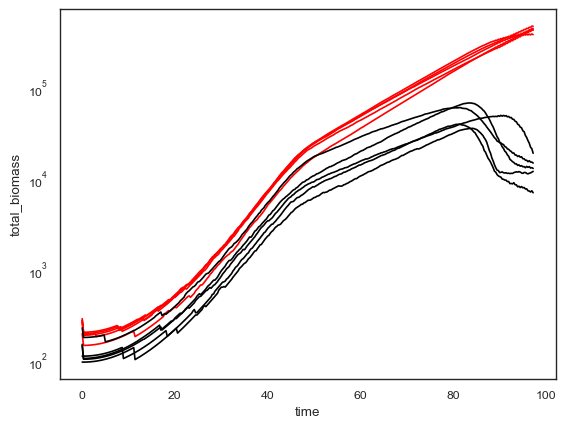

In [244]:
f, ax = plt.subplots()
for i in [1,2,3,4,5]:
    cell = sorted.mother_cell.iloc[-i]
    data = df.loc[df.mother_cell==cell,['time','total_biomass']].groupby('time').mean().reset_index()
    sns.lineplot(x='time',y='total_biomass',data=data,color='r',ax=ax)
for i in [0,1,2,3,4]:
    cell = sorted.mother_cell.iloc[i]
    data = df.loc[df.mother_cell==cell,['time','total_biomass']].groupby('time').mean().reset_index()
    sns.lineplot(x='time',y='total_biomass',data=data,color='k',ax=ax)
ax.set_yscale('log')
plt.show()

# Plotting time between division

In [245]:
cells = sorted.mother_cell
divs = pd.DataFrame(columns=['ID','Division','dt'])
df2 = x.positions.copy()
#cells.sort()
for cell in cells:
    data = df2[(df2.ID==cell)].reset_index()
    pks, _ = find_peaks(data.biomass,width=1)
    p0 = 0
    for i,p1 in enumerate(pks):
        dt = data.time[p1]-data.time[p0]
        #dy = data.biomass[p1]-data.biomass[p0]
        #dydt = dy/dt
        divs = divs.append(pd.DataFrame([[cell,i+1,dt]],columns=['ID','Division','dt']),ignore_index=True)
        #print(dydt)
        p0=p1+1
#plot cell id vs division rate over time
piv2 = divs.groupby(['ID','Division'], sort=False)['dt'].mean().unstack()


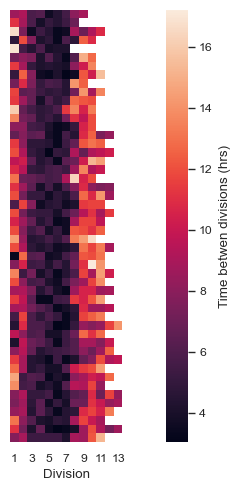

In [246]:
sns.set_style('white')
sns.set_context('paper')
f, ax = plt.subplots(figsize=(9,5))
g=sns.heatmap(piv2,ax=ax,square=True,xticklabels=2)
cbar = g.collections[0].colorbar
cbar.ax.set_ylabel(r'Time betwen divisions (hrs)')

ax.set_yticklabels([])
ax.set_ylabel('')
f.tight_layout()
plt.show()
f.savefig('../figures/division-time.pdf',bbox_inches='tight')


In [247]:

def single_colony(df,colony,timepoint,ax=None,window=None,c=None):
    ax = ax or plt.gca()
    colony1 = df.loc[df.mother_cell==colony]
    img_size = 2000
    if window is None:
        x_min = round((colony1.x.min()-colony1.radius.mean()*5)/dims[0]*img_size)
        x_max = round((colony1.x.max()+colony1.radius.mean()*5)/dims[0]*img_size)
        y_min = round((colony1.y.min()-colony1.radius.mean()*5)/dims[1]*img_size)
        y_max = round((colony1.y.max()+colony1.radius.mean()*5)/dims[1]*img_size)
    elif window > 0:
        center = df.loc[(df.Timestep==0) & (df.mother_cell==colony),['x','y']]
        x_min = int(center.x/dims[0]*img_size - window/2)
        x_max = int(center.x/dims[0]*img_size + window/2)
        y_min = int(center.y/dims[1]*img_size - window/2)
        y_max = int(center.y/dims[1]*img_size + window/2)
        if x_min < 0:
            x_min = 0
            x_max = int(x_min + window)
        elif x_max > img_size:
            x_min = int(img_size - window)
            x_max = img_size
        if y_min < 0:
            y_min = 0
            y_max = int(y_min + window)
        elif y_max > img_size:
            y_min = int(img_size - window)
            y_max = img_size
    if c is None:
        color = (0,0,0)
    elif type(c) is str:
        color = tuple((np.array(mpl.colors.to_rgb(c))*256).astype('int'))
        print(type(color))
    elif type(c) is tuple:
        color =c 

    bk = 255 * np.ones(shape=[img_size, img_size, 3], dtype=np.uint8)
    tp = df.loc[(df.Timestep==timepoint) & (df.mother_cell==colony)]
    circles = [cv2.circle(bk,center = (round(x/dims[0]*img_size),
                round(y/dims[1]*img_size)),radius = round(radius/dims[1]*img_size),
                color = color,thickness = -1) for x,y, radius in zip(tp.x,tp.y,tp.radius)]

    ax.imshow(bk[y_min:y_max,x_min:x_max])
   
    return


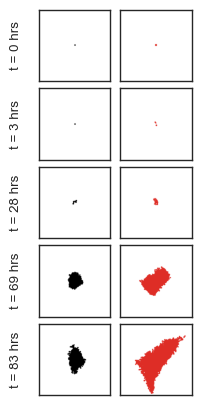

In [248]:
times = [0,1000,10000,25000,30000]
window = 900
f, axes = plt.subplots(nrows=len(times),ncols=2,figsize=(2,5))
for i,time in enumerate(times):
    single_colony(df,least_fit,time,ax=axes[i,0],window=window)
    single_colony(df,most_fit,time,ax=axes[i,1],window=window,c=(222,45,38))
    hrs = round(time/360,0)
    axes[i,0].set_ylabel(f't = {hrs:.0f} hrs')
plt.subplots_adjust(wspace=.1,hspace=.1)
for ax in axes.ravel():
    ax.axes.xaxis.set_visible(False)
    ax.set_yticklabels([])
    #ax.axes.yaxis.set_visible(False)
#f.tight_layout()
plt.show()
f.savefig('../figures/single-colonies.pdf',bbox_inches='tight')


In [249]:
""" from skimage.color import rgb2gray
from skimage.segmentation import find_boundaries
crop = rgb2gray(bk[y_min:y_max,x_min:x_max])
bd = find_boundaries(crop, mode='thick',background=255).astype(int)
im = crop*bd
im.shape """


" from skimage.color import rgb2gray\nfrom skimage.segmentation import find_boundaries\ncrop = rgb2gray(bk[y_min:y_max,x_min:x_max])\nbd = find_boundaries(crop, mode='thick',background=255).astype(int)\nim = crop*bd\nim.shape "